In [20]:
from PIL import Image
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt

In [141]:
#p = Path("/home/shchen/DA_dahazing/datasets/dehazing/unlabeled")
#p = Path("/home/shchen/DA_dahazing/datasets/dehazing/train_b")
p = Path("/home/shchen/DA_dahazing/augment_results")

In [192]:
accepted = ["06"]

In [194]:
res_6 = res

In [193]:
first=True
for index, file in enumerate(os.listdir(p)):
    if index>3500:
        break
    if file.split(".")[0].split("_")[-1] not in accepted:
        continue
    file_path = Path(p,file)
    img = Image.open(file_path).convert('YCbCr')
    img = np.array(img.resize((256,256)))
    y_channel = img[:,:,0].flatten()
    if first:
        res = y_channel
        first = False
    else:
        res = np.hstack((res, y_channel))

In [ ]:
plt.hist(res_low_light, bins=256, log=True, histtype="step", density=True, label='real low light')
plt.hist(res_syn_low_light, bins=256, log=True, histtype="step", density=True, label='synthetic low light')
plt.hist(res_target, bins=256, log=True, histtype="step", density=True, label='ground truth')

In [139]:
res_low_light.shape[0], res_syn_low_light.shape[0]

(32833536, 32833536)

In [165]:
res.shape

(34078720,)

Text(0.5, 0, 'Illumination Value')

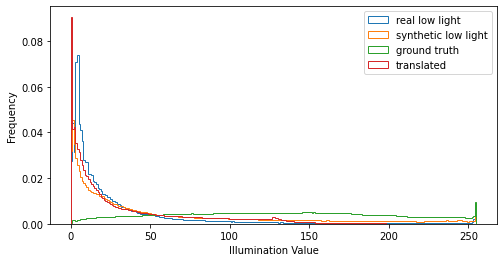

In [208]:
plt.hist(res_low_light, bins=256, log=False, histtype="step", density=True, label='real low light')
plt.hist(res_syn_low_light, bins=256, log=False, histtype="step", density=True, label='synthetic low light')
plt.hist(res_target, bins=256, log=False, histtype="step", density=True, label='ground truth')
plt.hist(res_10, bins=256, log=False, histtype="step", density=True, label='translated')
plt.legend()
plt.gcf().set_size_inches(8, 4)
plt.ylabel('Frequency')
plt.xlabel('Illumination Value')

Text(0.5, 0, 'Illumination Value')

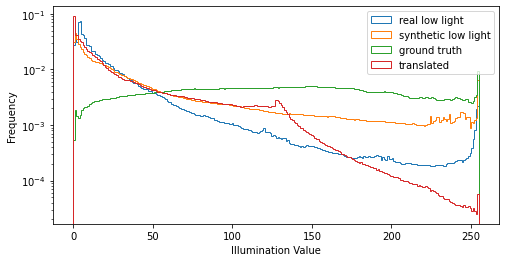

In [209]:
plt.hist(res_low_light, bins=256, log=True, histtype="step", density=True, label='real low light')
plt.hist(res_syn_low_light, bins=256, log=True, histtype="step", density=True, label='synthetic low light')
plt.hist(res_target, bins=256, log=True, histtype="step", density=True, label='ground truth')
plt.hist(res_10, bins=256, log=True, histtype="step", density=True, label='translated')
plt.legend()
plt.gcf().set_size_inches(8, 4)
plt.ylabel('Frequency')
plt.xlabel('Illumination Value')

Text(0.5, 0, 'Illumination Value')

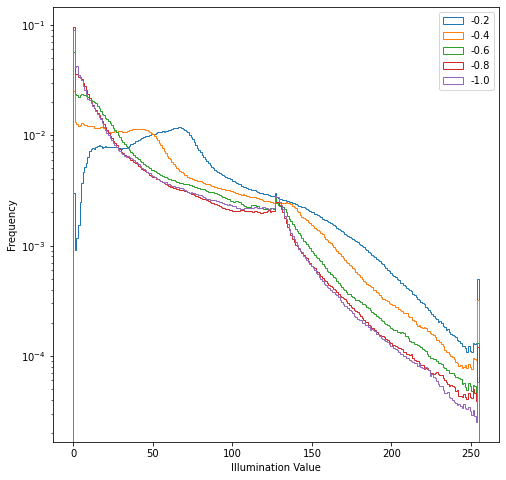

In [200]:
plt.hist(res_2, bins=256, log=True, histtype="step", density=True, label='-0.2')
plt.hist(res_4, bins=256, log=True, histtype="step", density=True, label='-0.4')
plt.hist(res_6, bins=256, log=True, histtype="step", density=True, label='-0.6')
plt.hist(res_8, bins=256, log=True, histtype="step", density=True, label='-0.8')
plt.hist(res_10, bins=256, log=True, histtype="step", density=True, label='-1.0')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.ylabel('Frequency')
plt.xlabel('Illumination Value')

In [68]:
res_low_light = res

In [73]:
res_syn_low_light = res

In [79]:
res_target = res